In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as spy
import re ##regex
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

##Structure and Characteristics of the dataset

In [3]:
df=pd.read_csv('scaler_kmeans.csv')
df.head(2)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0


In [4]:
df.shape

(205843, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [6]:
df.drop(columns=("Unnamed: 0"), axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [8]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


From the above data, we can get the statistical values of the dataset like Mean, Minimum, Maximum, Count and so on.

In [9]:
##checking null values in percent
df.isna().sum()/df.shape[0]*100

company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

In [10]:
## removing special characters from the dataset by using Regex
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string

In [11]:
df["company_hash"] = df["company_hash"].apply(lambda x: preprocess_string(str(x)))
df["email_hash"] = df["email_hash"].apply(lambda x: preprocess_string(str(x)))

In [12]:
# dropping duplicated values and keeping only 1st values
df.drop_duplicates(keep= "last", inplace= True)

In [13]:
# dropping null vlaues from orgyear and company_hash
df.dropna(subset = ['orgyear'],inplace=True)

In [14]:
df.isna().sum()

company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position        52523
ctc_updated_year        0
dtype: int64

In [15]:
# converting datatype to int
df[['orgyear','ctc_updated_year']] = df[['orgyear','ctc_updated_year']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205724 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   company_hash      205724 non-null  object
 1   email_hash        205724 non-null  object
 2   orgyear           205724 non-null  int64 
 3   ctc               205724 non-null  int64 
 4   job_position      153201 non-null  object
 5   ctc_updated_year  205724 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 11.0+ MB


In [17]:
df["orgyear"].value_counts()

2018    25253
2019    23421
2017    23233
2016    23038
2015    20609
        ...  
2107        1
1972        1
2101        1
208         1
200         1
Name: orgyear, Length: 77, dtype: int64

In [18]:
lst= list(df["orgyear"].value_counts().index)
lst

[2018,
 2019,
 2017,
 2016,
 2015,
 2014,
 2020,
 2013,
 2012,
 2011,
 2010,
 2009,
 2021,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2022,
 2001,
 2002,
 2000,
 1999,
 1998,
 2023,
 1997,
 1996,
 1995,
 1991,
 1993,
 1994,
 1992,
 2024,
 1990,
 1989,
 0,
 2025,
 1988,
 2026,
 1986,
 1987,
 3,
 1985,
 2031,
 2029,
 1982,
 2028,
 1984,
 91,
 2,
 20165,
 1970,
 6,
 5,
 1,
 1979,
 83,
 209,
 2204,
 1977,
 1900,
 201,
 38,
 4,
 1971,
 206,
 1976,
 2027,
 1981,
 1973,
 2106,
 2107,
 1972,
 2101,
 208,
 200]

In [19]:
df["company_hash"].value_counts().reset_index()

,index,company_hash
0,nvnv wgzohrnvzwj otqcxwto,8335
1,xzegojo,5381
2,vbvkgz,3480
3,zgn vuurxwvmrt vwwghzn,3411
4,wgszxkvzn,3239
...,...,...
37178,mrvwpmtqs,1
37179,zxwt ogenfvqt ogrhnxgzo uqxcvnt rxbxnta,1
37180,otwhqtrvjtq,1
37181,btaxvurtd xn otqcxwto,1


In [20]:
# company count in percent
(df["company_hash"].value_counts(normalize=True)*100).reset_index()

,index,company_hash
0,nvnv wgzohrnvzwj otqcxwto,4.051545
1,xzegojo,2.615640
2,vbvkgz,1.691587
3,zgn vuurxwvmrt vwwghzn,1.658047
4,wgszxkvzn,1.574440
...,...,...
37178,mrvwpmtqs,0.000486
37179,zxwt ogenfvqt ogrhnxgzo uqxcvnt rxbxnta,0.000486
37180,otwhqtrvjtq,0.000486
37181,btaxvurtd xn otqcxwto,0.000486


In [21]:
df["job_position"].value_counts()

Backend Engineer                  43533
FullStack Engineer                24703
Other                             18062
Frontend Engineer                 10412
Engineering Leadership             6867
                                  ...  
ayS                                   1
Principal Product Engineer            1
Senior Director of Engineering        1
Seller Support Associate              1
Android Application developer         1
Name: job_position, Length: 1017, dtype: int64

In [22]:
(df["job_position"].value_counts(normalize=True)*100)[:10]


Backend Engineer          28.415611
FullStack Engineer        16.124568
Other                     11.789740
Frontend Engineer          6.796300
Engineering Leadership     4.482347
QA Engineer                4.297622
Data Scientist             3.502588
Android Engineer           3.490186
SDET                       3.242146
Devops Engineer            3.008466
Name: job_position, dtype: float64

In [23]:
df["ctc_updated_year"].value_counts()


2019    68643
2021    64967
2020    49396
2017     7556
2018     6735
2016     5501
2015     2926
Name: ctc_updated_year, dtype: int64

In [24]:
df["ctc_updated_year"].value_counts(normalize=True)*100

2019    33.366549
2021    31.579689
2020    24.010811
2017     3.672882
2018     3.273804
2016     2.673971
2015     1.422294
Name: ctc_updated_year, dtype: float64

In [25]:
df[["company_hash", "job_position"]].value_counts().reset_index()

,company_hash,job_position,0
0,nvnv wgzohrnvzwj otqcxwto,Backend Engineer,1354
1,vbvkgz,Backend Engineer,1159
2,nvnv wgzohrnvzwj otqcxwto,Other,1058
3,gqvwrt,Backend Engineer,903
4,nvnv wgzohrnvzwj otqcxwto,FullStack Engineer,871
...,...,...,...
58911,nyxqafvqt ogrhnxgz rxbxnta,Engineering Leadership,1
58912,nyxqatjt avnv ucn rna,Data Scientist,1
58913,nyxqatjt avnv vzvrjnxwo ucn rna,Backend Engineer,1
58914,nyxqatjt xzw,iOS Engineer,1


In [26]:
df.loc[df["email_hash"]=="44427b918b304d84e4635e762dd42c1d8060c24ab1b45d0304e1168a6baa5db9"]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


In [27]:
df_company_emp= df.groupby(["company_hash", "email_hash"]).agg({"orgyear": "first",
                                                                     "ctc": "mean",
                                                                   "job_position": "last",
                                                                   "ctc_updated_year": "last"})
df2= df_company_emp.reset_index()

In [28]:
df2["job_position"].value_counts()

Backend Engineer                       38803
FullStack Engineer                     21309
Other                                  16045
Frontend Engineer                       9532
Engineering Leadership                  6366
                                       ...  
Assistant manager @ capital market         1
Associate Principal Engineer               1
sr. developer                              1
Cloud Software Engineer                    1
Area Operations Manager                    1
Name: job_position, Length: 820, dtype: int64

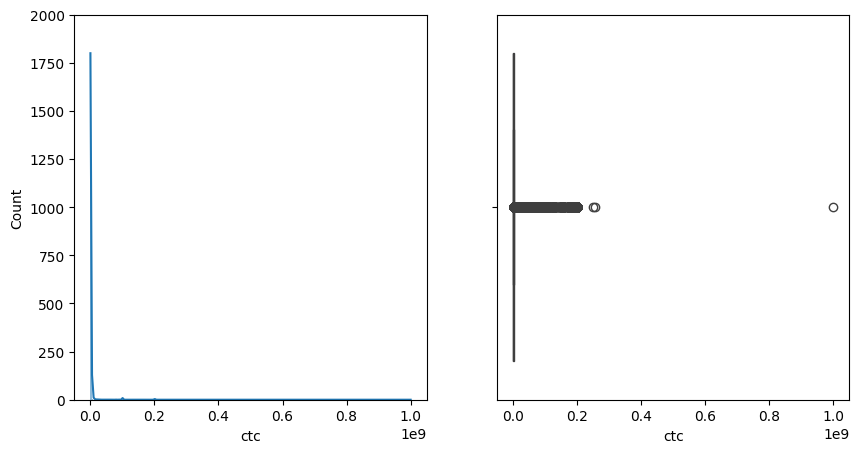

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x=df["ctc"], kde=True)
plt.ylim(0,2000)

plt.subplot(1,2,2)
sns.boxplot(x=df["ctc"])
plt.show()

<Axes: xlabel='ctc'>

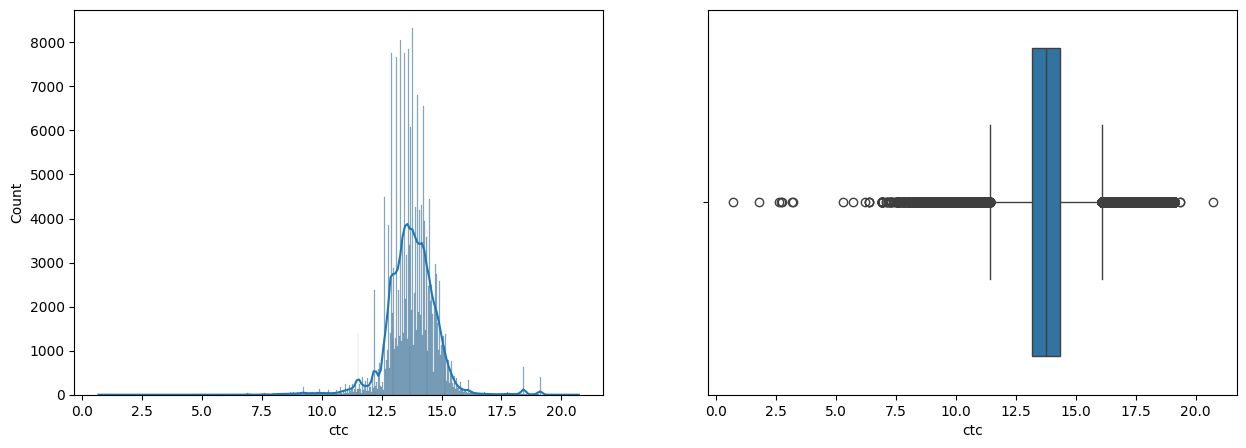

In [30]:
##using log transformation to check data distribution
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=np.log(df["ctc"]), kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=np.log(df["ctc"]))

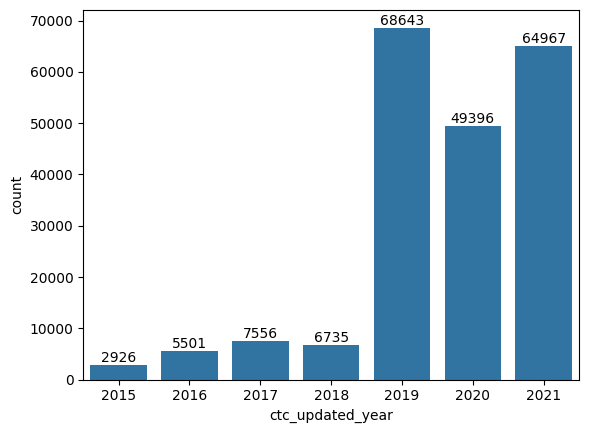

In [31]:
label= sns.countplot(x=df["ctc_updated_year"])
for i in label.containers:
  label.bar_label(i)
plt.show()

In [32]:
def orgyear_fix(x):
    if x["orgyear"]<=10:
        k = x["ctc_updated_year"]-x["orgyear"]
        return k
    elif x["orgyear"] > 2021:
        return 2021
    elif x["orgyear"]>=200 and x["orgyear"]<=202:
        return x["orgyear"]*10
    elif x["orgyear"]==206.0:
        return 2006
    elif x["orgyear"]==209.0:
        return 2009
    elif x["orgyear"]==208.0:
        return 2008
    elif x["orgyear"] == 91.0:
        return 1991
    elif x["orgyear"] == 83.0:
        return 1983
    elif x["orgyear"] == 38.0:
        return 2021
    elif x["orgyear"] == 1900.0:
        return x["ctc_updated_year"]
    else:
        return x["orgyear"]

In [35]:
df["orgyear"] = df.apply(orgyear_fix , axis = 1)

In [36]:
(df["orgyear"].value_counts(normalize=True)*100)[:10]

2018    12.276156
2019    11.387587
2017    11.294744
2016    11.201415
2015    10.018277
2014     8.115242
2020     6.526220
2013     6.004647
2012     5.100523
2011     3.874123
Name: orgyear, dtype: float64

<Axes: xlabel='orgyear', ylabel='Count'>

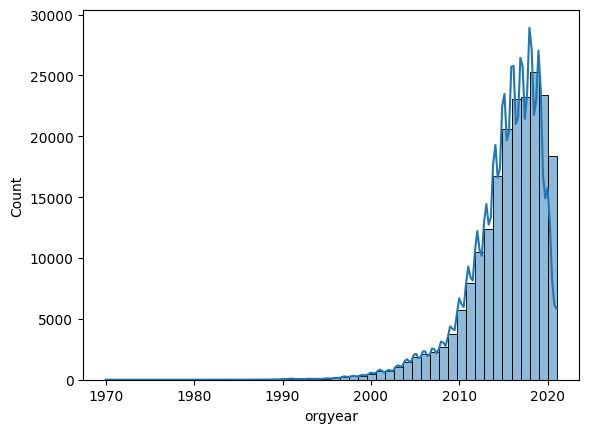

In [37]:
sns.histplot(df["orgyear"], bins= 50, kde= True)

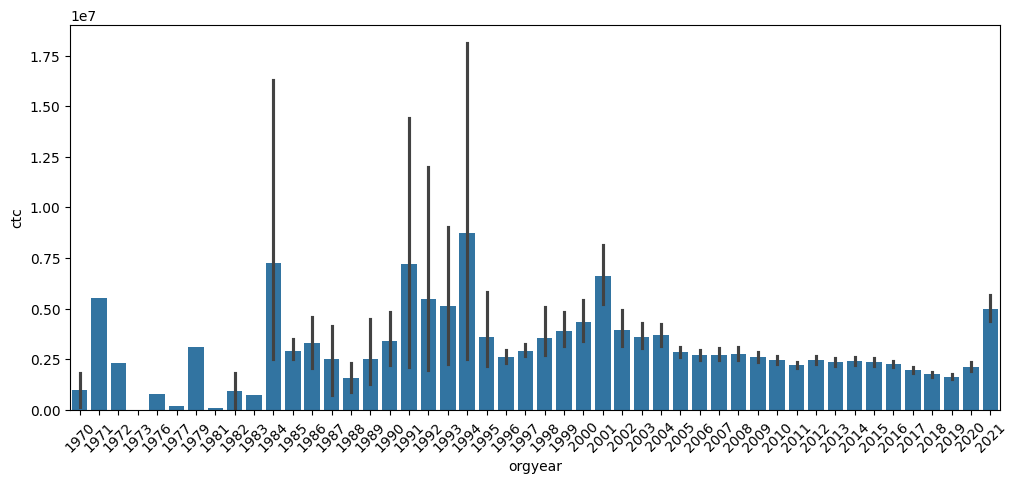

In [38]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x= "orgyear", y="ctc", estimator="mean")
plt.xticks(rotation= 45)
plt.show()

In [39]:
##removing the records where company or job_position reocords are not available
df= df.loc[~((df["company_hash"] == "") | (df["job_position"] == ""))]

In [40]:
df.loc[df["ctc_updated_year"] < df["orgyear"]].head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
8,utqoxontzn ojontbo,edabfebacbcbddacafbedefdbfcd,2020,450000,NaN,2019
17,puxn,bebacbdafcbcbceccfbbcdc,2020,1400000,NaN,2019
40,rvqotz nghmqg,bebbbadeedafdbdbed,2021,2500000,Other,2020
48,rgfto wgbuvzxto xzw,ceffcafbdfdeeaeeceeefdbc,2020,3010000,NaN,2019
56,axztqg xzzgcvnxgz ucn rna,aafddebdfcbabeccbce,2020,700000,Frontend Engineer,2019


In [41]:
(df["ctc_updated_year"] < df["orgyear"]).sum()

8074

In [42]:
df["ctc_updated_year"] = df[["ctc_updated_year","orgyear"]].max(axis = 1)

In [44]:
(df["ctc_updated_year"] < df["orgyear"]).sum()


0

In [45]:
df["year_of_exp"]= 2024- df["orgyear"]

In [46]:
pd.DataFrame({"count":df["year_of_exp"].value_counts(),
              "percent":df["year_of_exp"].value_counts(normalize=True)*100})

,count,percent
6,25241,12.274482
5,23404,11.381165
7,23234,11.298495
8,23040,11.204155
9,20602,10.018576
10,16692,8.117177
4,13413,6.522627
11,12349,6.005213
12,10490,5.101197
13,7970,3.875743


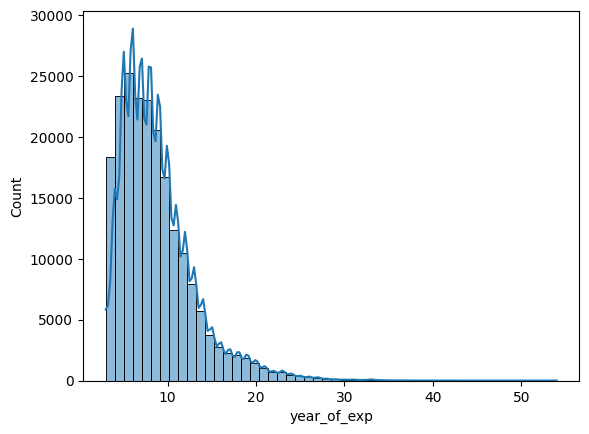

In [47]:
sns.histplot(df["year_of_exp"], kde=True, bins=50)
plt.show()

In [48]:
df["ctc"].quantile([0,0.2, 0.5, 0.75, 0.80,0.95, 0.985,0.99,1])

0.000    2.000000e+00
0.200    4.700000e+05
0.500    9.500000e+05
0.750    1.700000e+06
0.800    1.950000e+06
0.950    3.800000e+06
0.985    8.000000e+06
0.990    1.260000e+07
1.000    1.000150e+09
Name: ctc, dtype: float64

<Axes: >

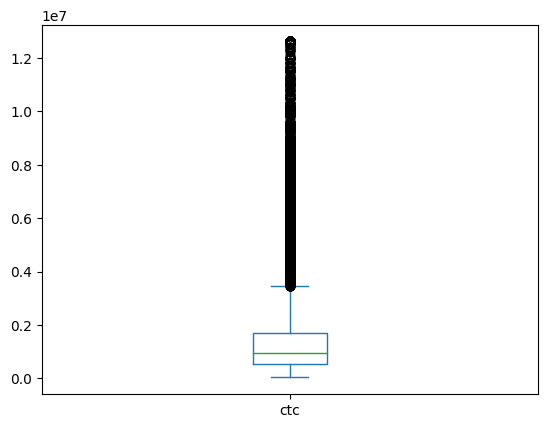

In [49]:
df["ctc"].clip(upper=df["ctc"].quantile(0.99), lower=df["ctc"].quantile(0.01)).plot(kind="box")

In [50]:
df = df.loc[((df.ctc) > df.ctc.quantile(0.01)) & ((df.ctc) < df.ctc.quantile(0.99))]


<Axes: >

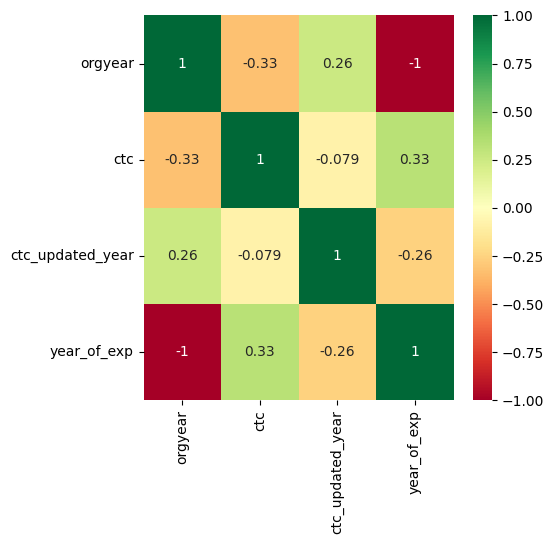

In [51]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(numeric_only=True) ,annot=True, cmap="RdYlGn")

In [52]:
Aggr= df.groupby(["company_hash", "job_position", "year_of_exp"]).agg({"ctc":["mean","median","max","min"]})
Aggr.head(5)

ctc  \
                                                                               mean   
company_hash                                 job_position     year_of_exp             
a                                            Product Manager  7            900000.0   
a b onttr wgqu                               Other            5            180000.0   
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx Other            9            463999.0   
a ntwy ogrhnxgzo ucn rna                     Assistant        11           400000.0   
a ntwyzgrgsxto                               Android Engineer 10           710000.0   

                                                                                     \
                                                                             median   
company_hash                                 job_position     year_of_exp             
a                                            Product Manager  7            900000.0   
a b onttr wgqu                               Other            5            180000.0   
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx Other            9            463999.0   
a ntwy ogrhnxgzo ucn rna                     Assistant        11           400000.0   
a ntwyzgrgsxto                               Android Engineer 10           710000.0   

                                                                                   \
                                                                              max   
company_hash                                 job_position     year_of_exp           
a                                            Product Manager  7            900000   
a b onttr wgqu                               Other            5            180000   
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx Other            9            463999   
a ntwy ogrhnxgzo ucn rna                     Assistant        11           400000   
a ntwyzgrgsxto                               Android Engineer 10           710000   

                                                                                   
                                                                              min  
company_hash                                 job_position     year_of_exp          
a                                            Product Manager  7            900000  
a b onttr wgqu                               Other            5            180000  
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx Other            9            463999  
a ntwy ogrhnxgzo ucn rna                     Assistant        11           400000  
a ntwyzgrgsxto                               Android Engineer 10           710000

In [53]:
Aggr = Aggr.reset_index()
Aggr.head(5)

company_hash      job_position year_of_exp  \
                                                                                
0                                             a   Product Manager           7   
1                                a b onttr wgqu             Other           5   
2  a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx             Other           9   
3                      a ntwy ogrhnxgzo ucn rna         Assistant          11   
4                                a ntwyzgrgsxto  Android Engineer          10   

        ctc                            
       mean    median     max     min  
0  900000.0  900000.0  900000  900000  
1  180000.0  180000.0  180000  180000  
2  463999.0  463999.0  463999  463999  
3  400000.0  400000.0  400000  400000  
4  710000.0  710000.0  710000  710000

In [54]:
Aggr.columns = [' '.join(col).strip() for col in Aggr.columns.values]
Aggr.head(5)

,company_hash,job_position,year_of_exp,ctc mean,ctc median,ctc max,ctc min
0,a,Product Manager,7,900000.0,900000.0,900000,900000
1,a b onttr wgqu,Other,5,180000.0,180000.0,180000,180000
2,a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,Other,9,463999.0,463999.0,463999,463999
3,a ntwy ogrhnxgzo ucn rna,Assistant,11,400000.0,400000.0,400000,400000
4,a ntwyzgrgsxto,Android Engineer,10,710000.0,710000.0,710000,710000


In [55]:
df_merged= df.merge(Aggr, on=("company_hash", "job_position", "year_of_exp"), how="left")
df_merged.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_exp,ctc mean,ctc median,ctc max,ctc min
0,atrgxnnt xzaxv,deadabcffcbcdcccaeacaf,2016,1100000,Other,2020,8,1.100000e+06,1100000.0,1100000.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,baafacbcbebacdaddcaabdccb,2018,449999,FullStack Engineer,2019,6,7.742856e+05,750000.0,1200000.0,449999.0
2,ojzwnvwnxw vx,cbcdfbcabaeaefddefdcdfbb,2015,2000000,Backend Engineer,2020,9,2.000000e+06,2000000.0,2000000.0,2000000.0
3,ngpgutaxv,effdedeaecafcaddbbcadddfec,2017,700000,Backend Engineer,2019,7,1.158571e+06,1200000.0,1750000.0,700000.0
4,qxen sqghu,ffefcbacdbcbdfabbbadb,2017,1400000,FullStack Engineer,2019,7,1.400000e+06,1400000.0,1400000.0,1400000.0


In [56]:
df_comp=df_merged.copy()

In [57]:
def cat_ctc(row, comparison_column):
    if row["ctc"]<0.5 * row[comparison_column]:
        return 3
    elif row["ctc"]>1.5 * row[comparison_column]:
        return  1
    else:
        return 2

In [58]:
df_comp['ctc_flag_mean'] = df_comp.apply(cat_ctc, args=('ctc mean',), axis=1)
df_comp['ctc_flag_median'] = df_comp.apply(cat_ctc, args=('ctc median',), axis=1)
df_comp.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_exp,ctc mean,ctc median,ctc max,ctc min,ctc_flag_mean,ctc_flag_median
0,atrgxnnt xzaxv,deadabcffcbcdcccaeacaf,2016,1100000,Other,2020,8,1.100000e+06,1100000.0,1100000.0,1100000.0,2,2
1,qtrxvzwt xzegwgbb rxbxnta,baafacbcbebacdaddcaabdccb,2018,449999,FullStack Engineer,2019,6,7.742856e+05,750000.0,1200000.0,449999.0,2,2
2,ojzwnvwnxw vx,cbcdfbcabaeaefddefdcdfbb,2015,2000000,Backend Engineer,2020,9,2.000000e+06,2000000.0,2000000.0,2000000.0,2,2
3,ngpgutaxv,effdedeaecafcaddbbcadddfec,2017,700000,Backend Engineer,2019,7,1.158571e+06,1200000.0,1750000.0,700000.0,2,2
4,qxen sqghu,ffefcbacdbcbdfabbbadb,2017,1400000,FullStack Engineer,2019,7,1.400000e+06,1400000.0,1400000.0,1400000.0,2,2


##Manual Clustering

In [59]:
agg_df_company_job = df.groupby(['company_hash', 'job_position']).agg({ 'ctc':['mean','median','max','min'] })
agg_df_company_job = agg_df_company_job.reset_index()
agg_df_company_job.columns = [' '.join(col).strip() for col in agg_df_company_job.columns.values]
agg_df_company_job.head()

,company_hash,job_position,ctc mean,ctc median,ctc max,ctc min
0,a,Product Manager,900000.0,900000.0,900000,900000
1,a b onttr wgqu,Other,180000.0,180000.0,180000,180000
2,a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,Other,463999.0,463999.0,463999,463999
3,a ntwy ogrhnxgzo ucn rna,Assistant,400000.0,400000.0,400000,400000
4,a ntwyzgrgsxto,Android Engineer,710000.0,710000.0,710000,710000


In [100]:
df_comp2 = df_comp.merge(agg_df_company_job, on=['company_hash','job_position'], how='left')
df_comp2.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_exp,ctc mean_x,ctc median_x,ctc max_x,ctc min_x,ctc_flag_mean,ctc_flag_median,ctc_class_mean,ctc_class_median,ctc mean_y,ctc median_y,ctc max_y,ctc min_y
0,atrgxnnt xzaxv,deadabcffcbcdcccaeacaf,2016,1100000,Other,2020,8,1.100000e+06,1100000.0,1100000.0,1100000.0,2,2,2,2,1.085000e+06,1085000.0,1100000.0,1070000.0
1,qtrxvzwt xzegwgbb rxbxnta,baafacbcbebacdaddcaabdccb,2018,449999,FullStack Engineer,2019,6,7.742856e+05,750000.0,1200000.0,449999.0,2,2,3,2,9.511363e+05,800000.0,2000000.0,300000.0
2,ojzwnvwnxw vx,cbcdfbcabaeaefddefdcdfbb,2015,2000000,Backend Engineer,2020,9,2.000000e+06,2000000.0,2000000.0,2000000.0,2,2,2,2,2.000000e+06,2000000.0,2000000.0,2000000.0
3,ngpgutaxv,effdedeaecafcaddbbcadddfec,2017,700000,Backend Engineer,2019,7,1.158571e+06,1200000.0,1750000.0,700000.0,2,2,3,3,1.500000e+06,1540000.0,3500000.0,520000.0
4,qxen sqghu,ffefcbacdbcbdfabbbadb,2017,1400000,FullStack Engineer,2019,7,1.400000e+06,1400000.0,1400000.0,1400000.0,2,2,1,1,8.466667e+05,600000.0,1400000.0,540000.0


In [101]:
df_comp['ctc_class_mean'] = df_comp2.apply(cat_ctc, args=('ctc mean_y',), axis=1)
df_comp['ctc_class_median'] = df_comp2.apply(cat_ctc, args=('ctc median_y',), axis=1)
df_comp2.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_exp,ctc mean_x,ctc median_x,ctc max_x,ctc min_x,ctc_flag_mean,ctc_flag_median,ctc_class_mean,ctc_class_median,ctc mean_y,ctc median_y,ctc max_y,ctc min_y
0,atrgxnnt xzaxv,deadabcffcbcdcccaeacaf,2016,1100000,Other,2020,8,1.100000e+06,1100000.0,1100000.0,1100000.0,2,2,2,2,1.085000e+06,1085000.0,1100000.0,1070000.0
1,qtrxvzwt xzegwgbb rxbxnta,baafacbcbebacdaddcaabdccb,2018,449999,FullStack Engineer,2019,6,7.742856e+05,750000.0,1200000.0,449999.0,2,2,3,2,9.511363e+05,800000.0,2000000.0,300000.0
2,ojzwnvwnxw vx,cbcdfbcabaeaefddefdcdfbb,2015,2000000,Backend Engineer,2020,9,2.000000e+06,2000000.0,2000000.0,2000000.0,2,2,2,2,2.000000e+06,2000000.0,2000000.0,2000000.0
3,ngpgutaxv,effdedeaecafcaddbbcadddfec,2017,700000,Backend Engineer,2019,7,1.158571e+06,1200000.0,1750000.0,700000.0,2,2,3,3,1.500000e+06,1540000.0,3500000.0,520000.0
4,qxen sqghu,ffefcbacdbcbdfabbbadb,2017,1400000,FullStack Engineer,2019,7,1.400000e+06,1400000.0,1400000.0,1400000.0,2,2,1,1,8.466667e+05,600000.0,1400000.0,540000.0


In [102]:
agg_df_company = df.groupby(['company_hash']).agg({ 'ctc':['mean','median','max','min'] })
agg_df_company = agg_df_company.reset_index()
agg_df_company.columns = [' '.join(col).strip() for col in agg_df_company.columns.values]
agg_df_company

,company_hash,ctc mean,ctc median,ctc max,ctc min
0,a,900000.0,900000.0,900000,900000
1,a b onttr wgqu,180000.0,180000.0,180000,180000
2,a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,463999.0,463999.0,463999,463999
3,a ntwy ogrhnxgzo ucn rna,400000.0,400000.0,400000,400000
4,a ntwyzgrgsxto,1234687.5,600000.0,4000000,350000
...,...,...,...,...,...
36069,zyvzwt wgzohrnxzs tzsxzttqo,940000.0,940000.0,940000,940000
36070,zz,935000.0,935000.0,1370000,500000
36071,zzb ztdnstz vacxogqj ucn rna,600000.0,600000.0,600000,600000
36072,zzgato,130000.0,130000.0,130000,130000


In [103]:
df_comp3 = df_comp2.merge(agg_df_company, on=['company_hash'], how='left')
df_comp3.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_exp,ctc mean_x,ctc median_x,ctc max_x,...,ctc_class_mean,ctc_class_median,ctc mean_y,ctc median_y,ctc max_y,ctc min_y,ctc mean,ctc median,ctc max,ctc min
0,atrgxnnt xzaxv,deadabcffcbcdcccaeacaf,2016,1100000,Other,2020,8,1.100000e+06,1100000.0,1100000.0,...,2,2,1.085000e+06,1085000.0,1100000.0,1070000.0,1.115667e+06,1070000.0,1771000,500000
1,qtrxvzwt xzegwgbb rxbxnta,baafacbcbebacdaddcaabdccb,2018,449999,FullStack Engineer,2019,6,7.742856e+05,750000.0,1200000.0,...,3,2,9.511363e+05,800000.0,2000000.0,300000.0,1.208052e+06,900000.0,7200000,200000
2,ojzwnvwnxw vx,cbcdfbcabaeaefddefdcdfbb,2015,2000000,Backend Engineer,2020,9,2.000000e+06,2000000.0,2000000.0,...,2,2,2.000000e+06,2000000.0,2000000.0,2000000.0,2.000000e+06,2000000.0,2000000,2000000
3,ngpgutaxv,effdedeaecafcaddbbcadddfec,2017,700000,Backend Engineer,2019,7,1.158571e+06,1200000.0,1750000.0,...,3,3,1.500000e+06,1540000.0,3500000.0,520000.0,1.713929e+06,1400000.0,4700000,200000
4,qxen sqghu,ffefcbacdbcbdfabbbadb,2017,1400000,FullStack Engineer,2019,7,1.400000e+06,1400000.0,1400000.0,...,1,1,8.466667e+05,600000.0,1400000.0,540000.0,9.400000e+05,850000.0,1400000,540000


In [104]:
df_comp3['ctc_tier_mean'] = df_comp3.apply(cat_ctc, args=('ctc mean',), axis=1)
df_comp3['ctc_tier_median'] = df_comp3.apply(cat_ctc, args=('ctc median',), axis=1)
df_comp3.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_exp,ctc mean_x,ctc median_x,ctc max_x,...,ctc mean_y,ctc median_y,ctc max_y,ctc min_y,ctc mean,ctc median,ctc max,ctc min,ctc_tier_mean,ctc_tier_median
0,atrgxnnt xzaxv,deadabcffcbcdcccaeacaf,2016,1100000,Other,2020,8,1.100000e+06,1100000.0,1100000.0,...,1.085000e+06,1085000.0,1100000.0,1070000.0,1.115667e+06,1070000.0,1771000,500000,2,2
1,qtrxvzwt xzegwgbb rxbxnta,baafacbcbebacdaddcaabdccb,2018,449999,FullStack Engineer,2019,6,7.742856e+05,750000.0,1200000.0,...,9.511363e+05,800000.0,2000000.0,300000.0,1.208052e+06,900000.0,7200000,200000,3,3
2,ojzwnvwnxw vx,cbcdfbcabaeaefddefdcdfbb,2015,2000000,Backend Engineer,2020,9,2.000000e+06,2000000.0,2000000.0,...,2.000000e+06,2000000.0,2000000.0,2000000.0,2.000000e+06,2000000.0,2000000,2000000,2,2
3,ngpgutaxv,effdedeaecafcaddbbcadddfec,2017,700000,Backend Engineer,2019,7,1.158571e+06,1200000.0,1750000.0,...,1.500000e+06,1540000.0,3500000.0,520000.0,1.713929e+06,1400000.0,4700000,200000,3,2
4,qxen sqghu,ffefcbacdbcbdfabbbadb,2017,1400000,FullStack Engineer,2019,7,1.400000e+06,1400000.0,1400000.0,...,8.466667e+05,600000.0,1400000.0,540000.0,9.400000e+05,850000.0,1400000,540000,2,1


In [105]:
##Top 10 employees (earning more than most of the employees in the company)
df_comp3[["company_hash","email_hash", "ctc", "ctc_tier_mean"]].sort_values(by="ctc_tier_mean").head(10)

,company_hash,email_hash,ctc,ctc_tier_mean
85957,rvqotz nghmqg,eebaafddcdacdaefabcccefbaa,1400000,1
21607,mgowy,ddbbcdaedccbceddfceee,1500000,1
83236,nvnv wgzohrnvzwj otqcxwto,bdfbdbafabababacfaeead,1100000,1
156146,wvustbxzx,cadefcdfebeecdacdaaee,1600000,1
179295,nqvpxzcton,efebeeaabefdbdddfabcfacbc,2600000,1
116723,tuvb ojontbo,bceedaecffedebfdcdffe,1800000,1
116722,ftmphr ogenfvqt ucn rna,abecaecebbdecadafdfadd,1000000,1
116721,zgn vuurxwvmrt vwwghzn,abbddafeddbccdafdecfbcffeaefb,9000000,1
116718,xzeg tast xzaxv rxbxnta,bbbbcaebbfdadfdfdcdaedacfd,3300000,1
116715,xzegojo,cbefccefefaabcaeecefabadedacb,2800000,1


In [106]:
##Top 10 companies based on their CTC
df_comp3.sort_values(by="ctc", ascending=False)["company_hash"].head(10)


126383         xzntr wgqugqvnxgz
177150                 bxwqgogen
69299                     vbvkgz
103539    zgn vuurxwvmrt vwwghzn
61741                     uvjuvr
78666                      vvvvv
15291                 vrnxbtnqxp
69810                       wmqt
114951    zgn vuurxwvmrt vwwghzn
62267                        zvz
Name: company_hash, dtype: object

In [107]:
##Bottom 10 employees earning less than most of the employees in the company
df_comp3[["company_hash","email_hash", "ctc", "ctc_tier_mean"]].sort_values(by="ctc_tier_mean", ascending= False).head(10)


,company_hash,email_hash,ctc,ctc_tier_mean
172759,adw ntwyzgrgsj,becfdaffabaddcbcbbcfabddaeaec,409999,3
23304,zgn vuurxwvmrt vwwghzn,ceeecfadceebebdfcafcddb,450000,3
84675,vagmt,afafcbffbcacfbadcffddfdbf,990000,3
84676,mqgvawgb rxbxnta,bacadceabfffbcdceebbdcbcbe,450000,3
118528,zdu otbxwgzahwngqo,cafbecaadfddfcefdfbedbcfafdeae,490000,3
178741,lxg,bfefbcfaecccdbdeccbedaceff,550000,3
178742,zgn vuurxwvmrt vwwghzn,efaaafabfdefafbbbeababfddcd,300000,3
23315,fvrbvqn rvmo,dfcecaebbcadfeeebdeebbbbee,810000,3
23314,vbvkgz,cacadfebafadbfdfcbbacbbcdaaf,800000,3
178745,ng nyt ztf ucn rna,acbbeffbbebebaebebdbeeaa,650000,3


In [112]:
top_2_positions = df_comp3.groupby('company_hash').apply(lambda x: x.nlargest(2, 'ctc')).reset_index(drop=True)

In [114]:
top_2_positions[["company_hash", "email_hash"]].head(10)

,company_hash,email_hash
0,a,aedcaafaffadcddbcada
1,a b onttr wgqu,bdfdcedddbcaeadedfddbedbacab
2,a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx,caaebdcbeddefbcfbebda
3,a ntwy ogrhnxgzo ucn rna,efbedacabdefadebffdef
4,a ntwy ogrhnxgzo ucn rna,efbedacabdefadebffdef
5,a ntwyzgrgsxto,acafdedcccddedaaadacb
6,a ntwyzgrgsxto,acafdedcccddedaaadacb
7,a onvq ntwyzgrgsxto,cadcdcadfaecfacecbbaa
8,a rgsxw ucn rna,daebaffbdedabfcffeffcdf
9,a t oyvf ogenfvqt xzaxv ucn rna,decccffcbdcdeeeecfcbeaef


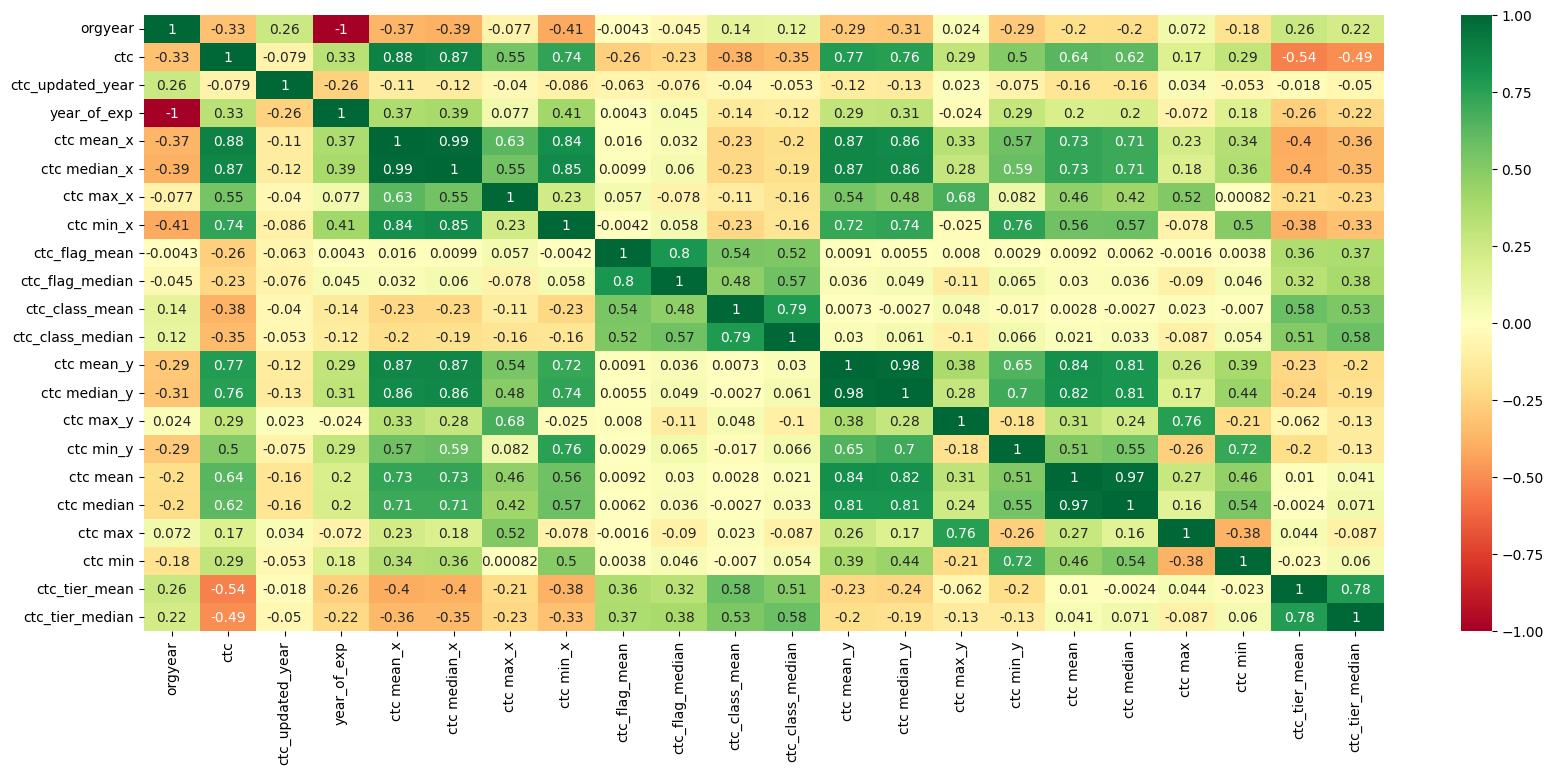

In [113]:
corr = df_comp3.corr(numeric_only= True)
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap="RdYlGn")
plt.show()

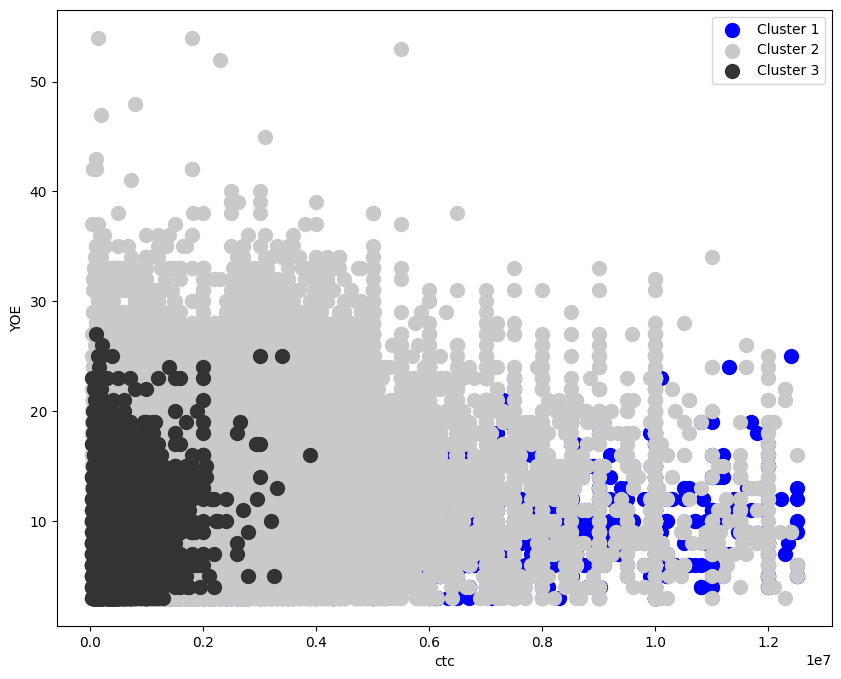

In [115]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(df_comp3[df_comp3['ctc_flag_mean'] == 1]['ctc'], df_comp3[df_comp3['ctc_flag_mean'] == 1]['year_of_exp'], s=100, c='blue', label = 'Cluster 1')
plt.scatter(df_comp3[df_comp3['ctc_flag_mean'] == 2]['ctc'], df_comp3[df_comp3['ctc_flag_mean'] == 2]['year_of_exp'], s=100, c='0.788', label = 'Cluster 2')
plt.scatter(df_comp3[df_comp3['ctc_flag_mean'] == 3]['ctc'], df_comp3[df_comp3['ctc_flag_mean'] == 3]['year_of_exp'], s=100, c='.2', label = 'Cluster 3')
plt.xlabel('ctc')
plt.ylabel('YOE')
plt.legend()
plt.show()

In [119]:
df1= df_comp3.copy()
df1.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_exp,ctc mean_x,ctc median_x,ctc max_x,...,ctc mean_y,ctc median_y,ctc max_y,ctc min_y,ctc mean,ctc median,ctc max,ctc min,ctc_tier_mean,ctc_tier_median
0,atrgxnnt xzaxv,deadabcffcbcdcccaeacaf,2016,1100000,Other,2020,8,1.100000e+06,1100000.0,1100000.0,...,1.085000e+06,1085000.0,1100000.0,1070000.0,1.115667e+06,1070000.0,1771000,500000,2,2
1,qtrxvzwt xzegwgbb rxbxnta,baafacbcbebacdaddcaabdccb,2018,449999,FullStack Engineer,2019,6,7.742856e+05,750000.0,1200000.0,...,9.511363e+05,800000.0,2000000.0,300000.0,1.208052e+06,900000.0,7200000,200000,3,3
2,ojzwnvwnxw vx,cbcdfbcabaeaefddefdcdfbb,2015,2000000,Backend Engineer,2020,9,2.000000e+06,2000000.0,2000000.0,...,2.000000e+06,2000000.0,2000000.0,2000000.0,2.000000e+06,2000000.0,2000000,2000000,2,2
3,ngpgutaxv,effdedeaecafcaddbbcadddfec,2017,700000,Backend Engineer,2019,7,1.158571e+06,1200000.0,1750000.0,...,1.500000e+06,1540000.0,3500000.0,520000.0,1.713929e+06,1400000.0,4700000,200000,3,2
4,qxen sqghu,ffefcbacdbcbdfabbbadb,2017,1400000,FullStack Engineer,2019,7,1.400000e+06,1400000.0,1400000.0,...,8.466667e+05,600000.0,1400000.0,540000.0,9.400000e+05,850000.0,1400000,540000,2,1


In [120]:
df1.drop(columns = ["orgyear","email_hash","ctc mean", "ctc median", "ctc max", "ctc min", 'ctc mean_y', 'ctc median_y', 'ctc max_y', 'ctc min_y', 'ctc mean_x', 'ctc median_x','ctc max_x', 'ctc min_x','ctc_flag_mean', 'ctc_flag_median', 'ctc_tier_mean', 'ctc_tier_median','ctc_updated_year'], axis=1, inplace= True)

In [121]:
freq_map_company = df1['company_hash'].value_counts().to_dict()
freq_map_position = df1['job_position'].value_counts().to_dict()

# Map the frequency to the 'Company_hash' and 'job_position' feature
df1['company_hash'] = df1['company_hash'].map(freq_map_company)
df1['job_position'] = df1['job_position'].map(freq_map_position)

In [122]:
df1.columns

Index(['company_hash', 'ctc', 'job_position', 'year_of_exp', 'ctc_class_mean',
       'ctc_class_median'],
      dtype='object')

In [123]:
df1.shape

(201517, 6)

In [124]:
X= df1

In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201517 entries, 0 to 201516
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      201517 non-null  int64  
 1   ctc               201517 non-null  int64  
 2   job_position      149863 non-null  float64
 3   year_of_exp       201517 non-null  int64  
 4   ctc_class_mean    201517 non-null  int64  
 5   ctc_class_median  201517 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 10.8 MB


In [148]:
df1 = df1.dropna(axis=1)

In [149]:
scaler= StandardScaler()

In [150]:
scaler.fit(X)
X=scaler.transform(X)

In [151]:
# Specify the desired sample size
sample_size = 20000
sampled_data = df1.sample(n=sample_size, random_state=42)

In [152]:
sampled_data.shape

(20000, 6)

In [153]:
scaler= StandardScaler()

In [154]:
scaler.fit(sampled_data)

X_sample=scaler.transform(sampled_data)

In [155]:
kmeans_per_k = [KMeans(n_clusters=k,init="k-means++", n_init=10, random_state=42).fit(X_sample)
                for k in range(1, 10)]

In [156]:
silhouette_scores = [silhouette_score(X_sample, model.labels_)
                     for model in kmeans_per_k[1:]]

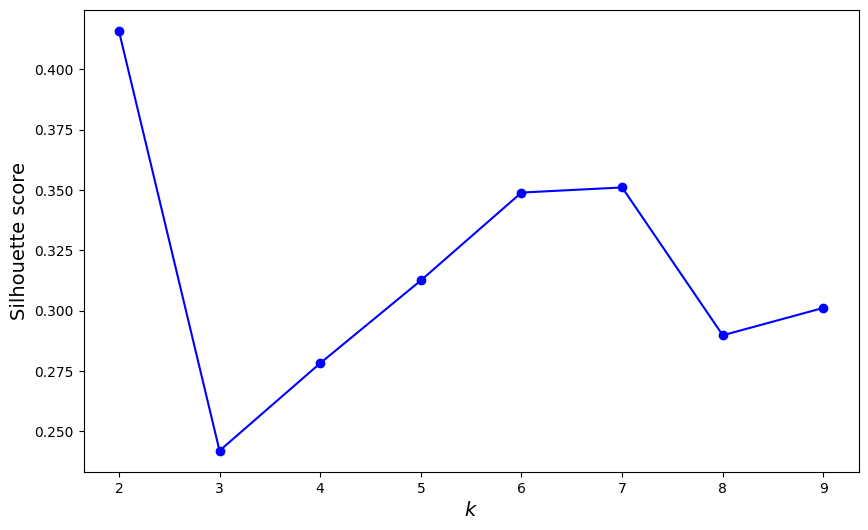

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [158]:
kmeans_per_k = [KMeans(n_clusters=k,init="k-means++", n_init=15, random_state=42).fit(X_sample)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

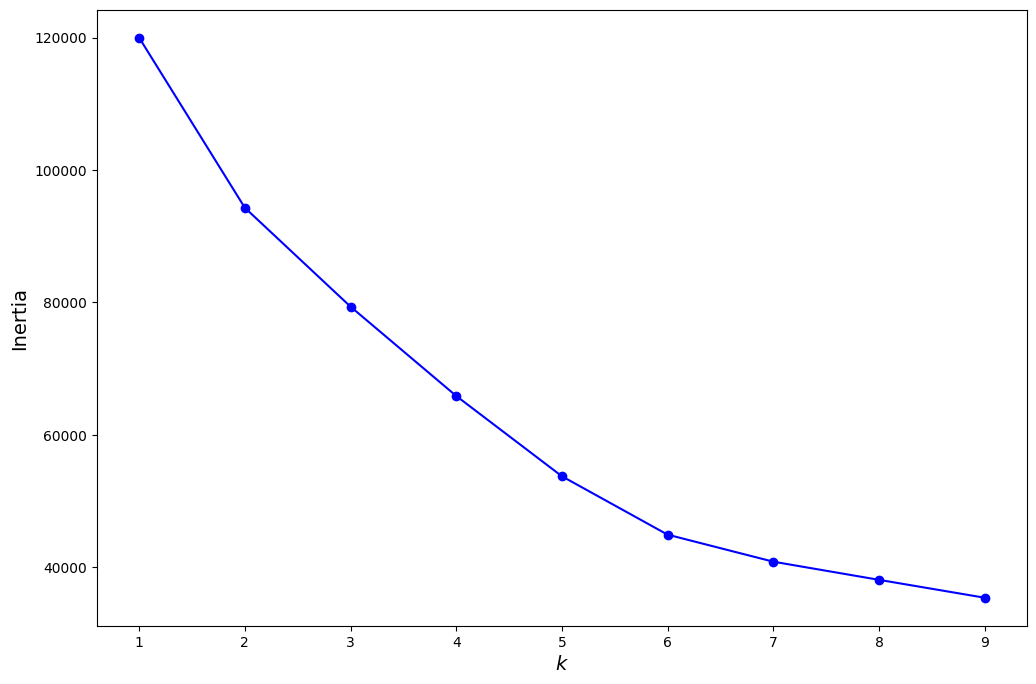

In [159]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [160]:
df1.shape

(149863, 6)

In [161]:
scaled_df= pd.DataFrame(X, columns=df1.columns, index=df.index)

In [162]:
k = 4
model = KMeans(n_clusters=k, init = 'k-means++', n_init=10,random_state=42)

##Insights & Recommendations

*   Job position as Backend Engineer has most frequency

*   In CTC column there is large difference in mean and median, we can say there are outliers, min CTC is 2 and max is 1000150000.

*   There are 1016 Unique job_position.


*   There are typographical errors or inaccuracies, such as instances where
years are recorded as 0, 1, 1900, 2101, 206, 4. Such entries for the orgyear feature lack logical coherence within the dataset.



*   Majority of the learners fall within the 12.5 -16 CTC range
*   In year 2019 most of the learner updated the CTC means got promotion followed by 2021 and 2020


*  The dataset mostly includes data from people with 3-12 years of experience. While we can try to collect data for other experience years, the density of data is inconsistent. Although we can use SMOTE to address this, we prefer to keep the original data for unsupervised learning.

*   For people with 8-12 years of experience, the CTC varies widely, with most of it concentrated in the 8 years of work experience. According to the data, CTC depends on factors other than YOE. There is also more data available for the 8-12 YOE range.
*   When using KMeans clustering, we found that the ideal number of clusters is 4 based on the Elbow method and silhouette_scores.





